In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets


In [2]:
titanic=pd.read_csv("titanic.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 107.5+ KB


In [5]:
titanic.survived.fillna((titanic["survived"].mode()[0]),inplace=True)
titanic.survived.isnull().sum()

0

In [6]:
titanic.sex.fillna((titanic["sex"].mode()[0]),inplace=True)
titanic.sex.isnull().sum()

0

In [7]:
titanic.sibsp.fillna((titanic["sibsp"].median()),inplace=True)
titanic.sibsp.isnull().sum()

0

In [8]:
titanic.pclass.fillna((titanic["pclass"].mode()[0]),inplace=True)
titanic.pclass.isnull().sum()

0

In [9]:
titanic.parch.fillna((titanic["parch"].mode()[0]),inplace=True)
titanic.parch.isnull().sum()

0

In [10]:
titanic.ticket.fillna(titanic["ticket"].mode()[0],inplace=True)
titanic.ticket.isnull().sum()

0

In [11]:
titanic.fare.fillna((titanic["fare"].mean()),inplace=True)

In [12]:
titanic["home.dest"].fillna((titanic["home.dest"].mode()[0]),inplace=True)
titanic["home.dest"].isnull().sum()

0

In [13]:
titanic["age"].fillna(titanic["age"].mean(),inplace=True)
titanic["age"].isnull().sum()

0

In [14]:
titanic["embarked"].fillna(titanic.embarked.mode()[0],inplace=True)
titanic["embarked"].isnull().sum()

0

In [15]:
titanic.isna().sum()

pclass          0
survived        0
name            1
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1015
embarked        0
boat          824
body         1189
home.dest       0
dtype: int64

In [16]:
titanic["cabin"].isnull().sum()

1015

In [17]:
len(titanic)

1310

In [18]:
titanic.drop(['cabin','body'], axis=1, inplace=True)

In [19]:
titanic["boat"].fillna("not available ",inplace=True )

In [20]:
titanic.dropna(axis=0,how='any',inplace=True)
titanic.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
boat         0
home.dest    0
dtype: int64

In [21]:
titanic["embarked"].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

titanic["sex"]=encoder.fit_transform(titanic["sex"])

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,S,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,S,not available,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,S,not available,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,S,not available,"Montreal, PQ / Chesterville, ON"


In [23]:
titanic["embarked"]=encoder.fit_transform(titanic["embarked"])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,2,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,2,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,2,not available,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,2,not available,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,2,not available,"Montreal, PQ / Chesterville, ON"


In [24]:
titanic["sibsp"]=titanic["sibsp"].astype(int)
titanic["parch"]=titanic["parch"].astype(int)
titanic["pclass"]=titanic["pclass"].astype(int)
titanic["survived"]=titanic["survived"].astype(int)


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int32  
 1   survived   1309 non-null   int32  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int32  
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int32  
 6   parch      1309 non-null   int32  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   embarked   1309 non-null   int32  
 10  boat       1309 non-null   object 
 11  home.dest  1309 non-null   object 
dtypes: float64(2), int32(6), object(4)
memory usage: 81.8+ KB


## splitting data 

In [26]:
y=titanic["survived"] 
x= titanic[[ "sex", "age"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)


## decision tree 

In [27]:
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
predicted=classifier.predict(x_test)

In [29]:
print("score{}".format(classifier.score(x_train,y_train)))

score0.8147086914995224


## decision tree plotting  

In [30]:
import graphviz

In [31]:
dot_data=tree.export_graphviz(classifier ,out_file=None,feature_names=x.columns )

In [32]:
graph=graphviz.Source(dot_data)

In [33]:
graph.render("data")

'data.pdf'

In [34]:
dtree=tree.DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=5,min_samples_leaf=3,max_depth=3)

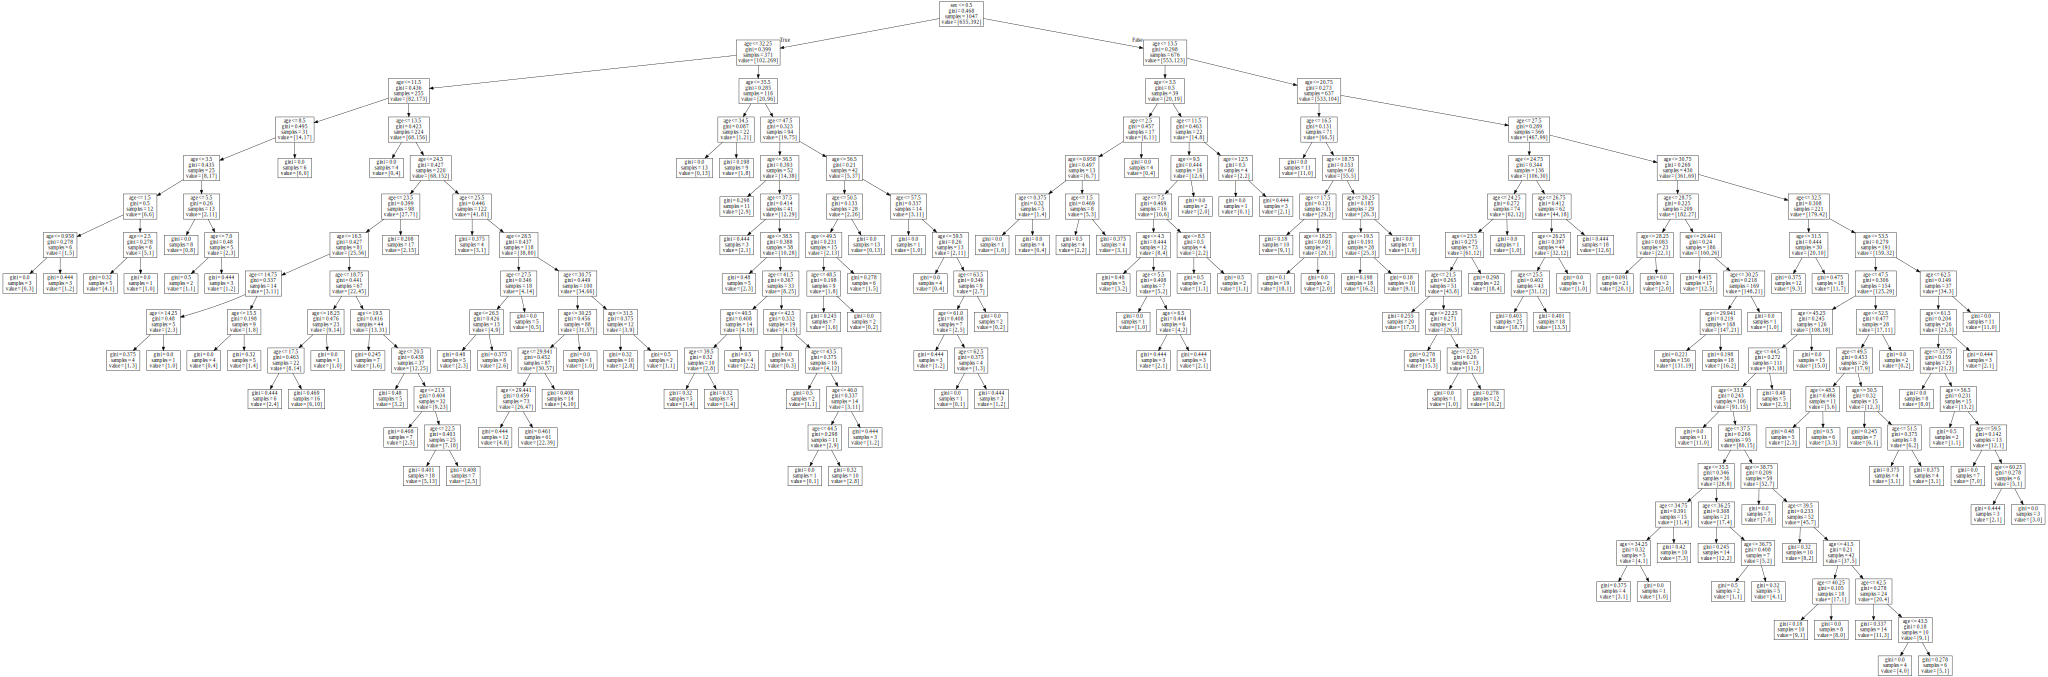

In [35]:
graph

he array indicates [number of death, number of survivals]. In each node we can see different split of the array and the rule classification to branch out to the lower level nodes. We can find out that if sex = female (≤0.5), the array indicates more survivors [102,269] and if sex is male there are more deaths than survivals [553,123] which means there's a higher chance of survival for females and death for males .
We can follow with the leaf level nodes as well.For example : the females under  the age of 32 have a higher rate of survival [82,173]. hence, the younger the female is , the more chance she has to survive 

## changing parameters 

In [36]:
y=titanic["survived"] 
x= titanic[[ "sex", "age","pclass","sibsp","parch"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [37]:
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
predicted=classifier.predict(x_test)

In [39]:
print("score{}".format(classifier.score(x_train,y_train)))

score0.9039301310043668


th current accuracy is higher than the previous one 0.814<0.903,since we added more features and modified the training set size 

In [40]:
dot_data=tree.export_graphviz(classifier ,out_file=None,feature_names=x.columns,filled=True , rounded=True )

In [41]:
graph=graphviz.Source(dot_data)

In [42]:
graph.render("data")

'data.pdf'

In [43]:
dtree=tree.DecisionTreeClassifier(criterion='gini',splitter="random",max_leaf_nodes=5,min_samples_leaf=3,max_depth=3)

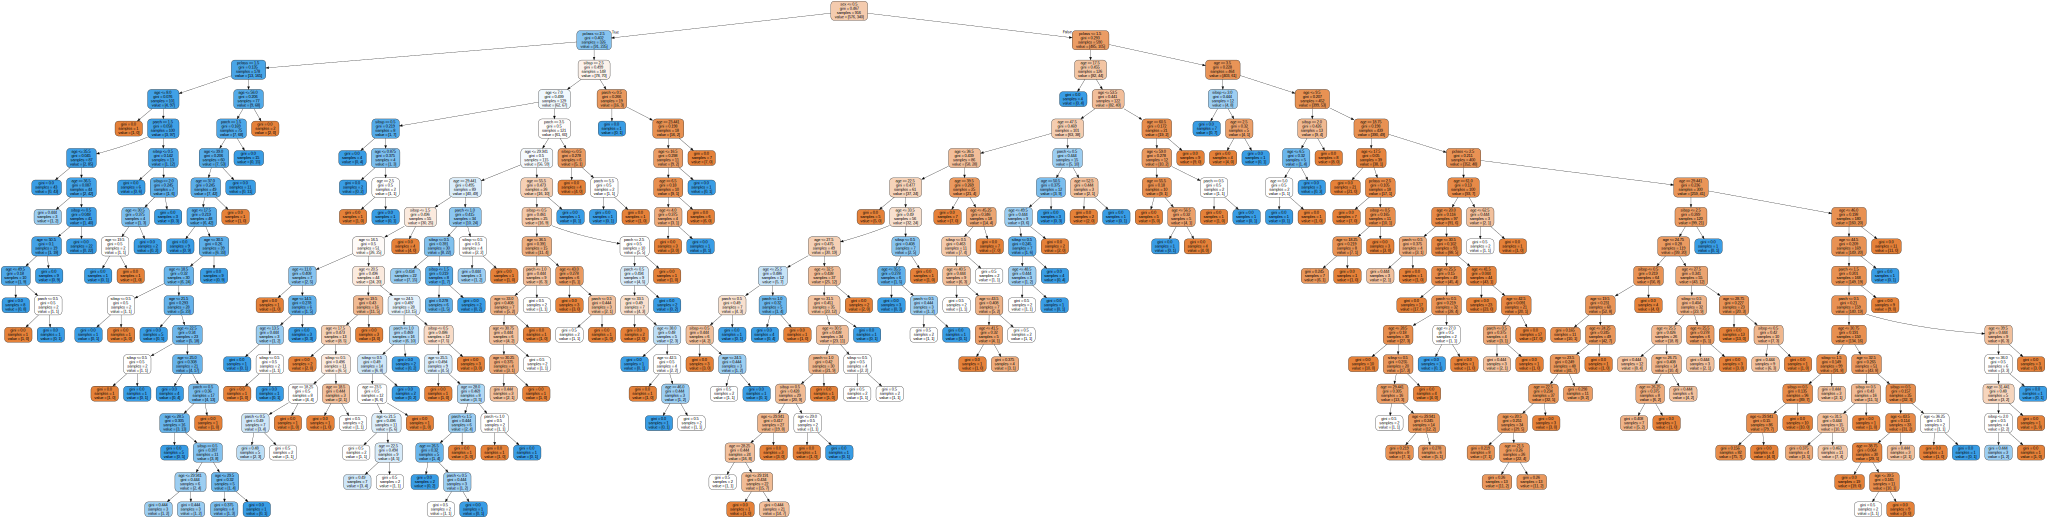

In [44]:
graph

## Random Forest 

In [52]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7684478371501272


In [53]:
clf=RandomForestClassifier(n_estimators=120)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7709923664122137


by increasing the umber of estimators(from 100 to 120) , the accuracy has increased as well(from 0.76844 to 0.7709). but that is not a rule .From the reaserches i made , i found out that the number of estimators should be between 64 and 128 and bare in mind that it depends also on the number of rows in the dataset  . Even in that range , we should try to find the number that gives us the best accuracy .